# Model Optimization

In this attempt, I'll manually select the features following intuition ;)

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('../input/processed_train.csv')
df.columns

Index(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'AgeBins_(0, 15]', 'AgeBins_(15, 25]', 'AgeBins_(25, 35]',
       'AgeBins_(35, 45]', 'AgeBins_(45, 55]', 'AgeBins_(55, 65]',
       'AgeBins_(65, 75]', 'AgeBins_(75, 85]', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'Deck_A', 'Deck_B',
       'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U0'],
      dtype='object')

In [4]:
features = ['FamilySize','Pclass_1','Sex_female','AgeBins_(35, 45]','Fare']

In [6]:
X = np.array(df[features])
y = np.array(df['Survived'])
X.shape

(891, 5)

In [7]:
clf = LogisticRegression()

In [8]:
# get base line for accuracy
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=10, scoring='accuracy')
print('Accuracy = %.3f' % scores.mean())

Accuracy = 0.792


## parameters optimization

In [10]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, X, y, param_grid):
    ''' get the parameters that return the best score
    parameters
    ----------
        model object
            a supervised learning estimator
        X    array
            training set
        y    array
            target values
        param_grid    dictionary
            the list of parameters and their possible values
    output
    ------
        best_params    dictionary
            the best value for each parameter in initial list
    '''
    
    scoring = 'accuracy'
    cv = 10
    
    grid = GridSearchCV(clf, 
                        param_grid,
                        scoring = scoring,
                        n_jobs = 1,
                        cv = cv)
    
    grid.fit(X,y)
    
    print(grid.best_score_)
    print(grid.best_estimator_)

In [11]:
param_grid = {'solver': ['liblinear','newton-cg','lbfgs'],
              'penalty': ['l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'fit_intercept': [True,False],
              'intercept_scaling':[0.001, 0.01, 0.1, 1, 10, 100, 1000]
              }

get_best_params(clf,X,y,param_grid)

0.800224466891
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


## train the model

In [12]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics 

clf = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [13]:
clf.score(X_test,y_test)

0.75418994413407825

In [14]:
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
print(cm)
print(metrics.classification_report(y_test, predictions))

Predicted   0   1
Actual           
0          90  18
1          26  45
             precision    recall  f1-score   support

          0       0.78      0.83      0.80       108
          1       0.71      0.63      0.67        71

avg / total       0.75      0.75      0.75       179



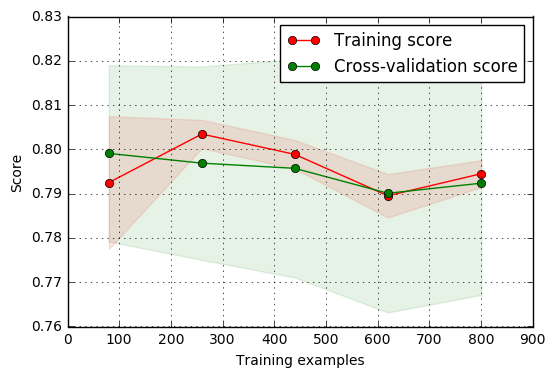

In [16]:
import matplotlib.pyplot as plt
train_sizes, train_scores, test_scores = learning_curve(lr, X, 
                                                        y, 
                                                        cv=10, 
                                                        train_sizes=np.linspace(.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure()
plt.grid()

plt.fill_between(train_sizes, 
                train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std,
                alpha=0.1, color='r')
plt.fill_between(train_sizes, 
                test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std,
                alpha=0.1, color='g')

plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
         label='Cross-validation score')

plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()  

## submit

In [18]:
test = pd.read_csv('../input/processed_test.csv')
X_sub = np.array(test[features])

In [19]:
y_sub = clf.predict(X_sub)
submission = pd.DataFrame({'PassengerId': test['PassengerId'],
                           'Survived': y_sub})
submission.to_csv('../output/tmlc_20161229_03.csv')